# Framework

## Imports

In [2]:
import keras.applications.vgg16 as vgg16
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Model

In [ ]:
tf.compat.v1.disable_eager_execution()
model= vgg16.VGG16(weights="imagenet")
preprocess = vgg16.preprocess_input
decode_predictions = vgg16.decode_predictions

## Load Image

In [ ]:
image_path = "data/tabby-cat.png"
image = cv.imread(image_path)
image = cv.resize(image, [224,224])

## Analyzing

### Monte Carlo Dropout

In [ ]:
#TODO
def monte_carlo(model, image):
    return "0,8"

### Layer Wise Relevance Propagation

#### Imports

In [ ]:
import innvestigate

#### innvestigate

In [ ]:
rule = "lrp.alpha_1_beta_0"
def analyze_image_lrp(image, model, rule):
    model = innvestigate.model_wo_softmax(model)
    analyzer = innvestigate.create_analyzer(rule, model)
    image_processed = preprocess(np.array(image)[None]) 
    lrp_image = analyzer.analyze(image_processed)
    lrp_image = lrp_image.sum(axis=np.argmax(np.asarray(lrp_image.shape) == 3))
    lrp_image /= np.max(np.abs(lrp_image))
    lrp_image = lrp_image[0]
    return lrp_image

### Grad-CAM

In [ ]:
#TODO

### LIME

Imports

In [ ]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

Instantiate Explainer + Function to get Explanation

In [ ]:
explainer = lime_image.LimeImageExplainer()

def get_lime_explanation(image, model, explainer):
    explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
    lime_image = mark_boundaries(temp / 2 + 0.5, mask)
    return lime_image

## Plotting

In [ ]:
def plot_1x4_grid(original_image, lrp_image, cam_image, lime_image, original_title, lrp_title, cam_title, lime_title):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    # Original + Monte Carlo
    axs[0].imshow(original_image, cmap='viridis')
    axs[0].set_title(original_title)
    axs[0].axis('off')
    # LRP
    axs[1].imshow(lrp_image, cmap="seismic", clim=(-1, 1))
    axs[1].set_title(lrp_title)
    axs[1].axis('off')

    axs[2].imshow(cam_image, cmap='viridis')
    axs[2].set_title(cam_title)
    axs[2].axis('off')

    axs[3].imshow(lime_image, cmap='viridis')
    axs[3].set_title(lime_title)
    axs[3].axis('off')

    plt.show()

In [ ]:
def predictions_model(image, model):
    x = preprocess(image[None])
    predictions = model.predict(x)
    decoded_predictions = decode_predictions(predictions, top=5)[0]
    return decoded_predictions[0]

In [ ]:
original_title = f"{predictions_model(image, model)}, Monte Carlo: {monte_carlo(model,image)}"
lrp_image = analyze_image_lrp(image, model, rule)
lime_image = get_lime_explanation(image, model, explainer)

KeyboardInterrupt: 

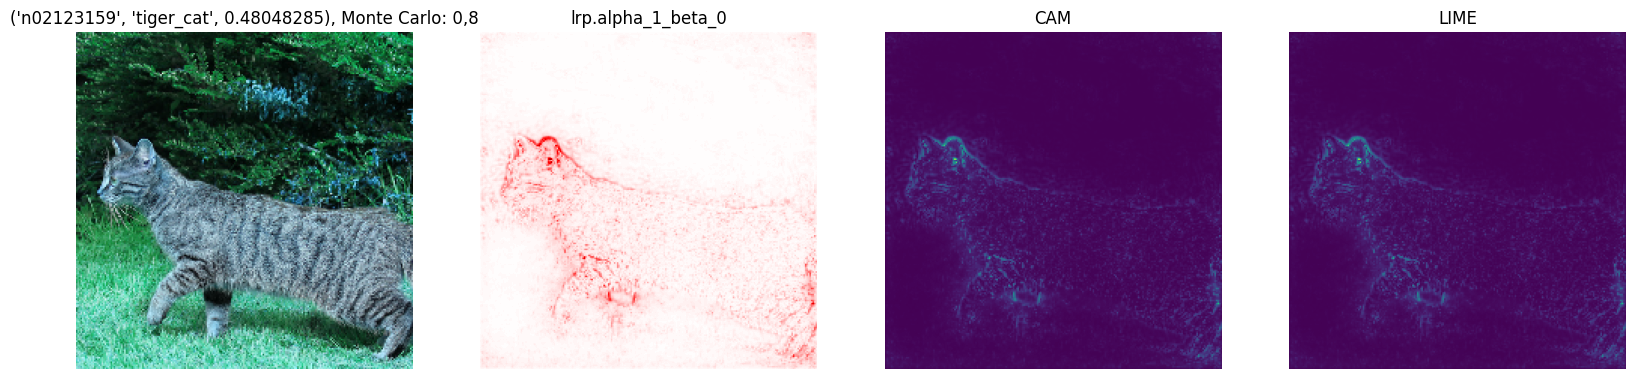

In [ ]:
plot_1x4_grid(original_image=image,
              original_title=original_title,
              lrp_image=lrp_image,
              lrp_title=rule,
              cam_image=lrp_image,
              cam_title="CAM",
              lime_image=lime_image,
              lime_title="LIME")